In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

/Users/cristian/miniconda3/envs/mlbook/lib/python3.5/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# Project Goals
To create a model that predicts median house values in Californian districts, given a number of features from these districts

# Get the data

In [2]:
file_name = 'data/raw/housing.csv'
housing_df = pd.read_csv(file_name)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


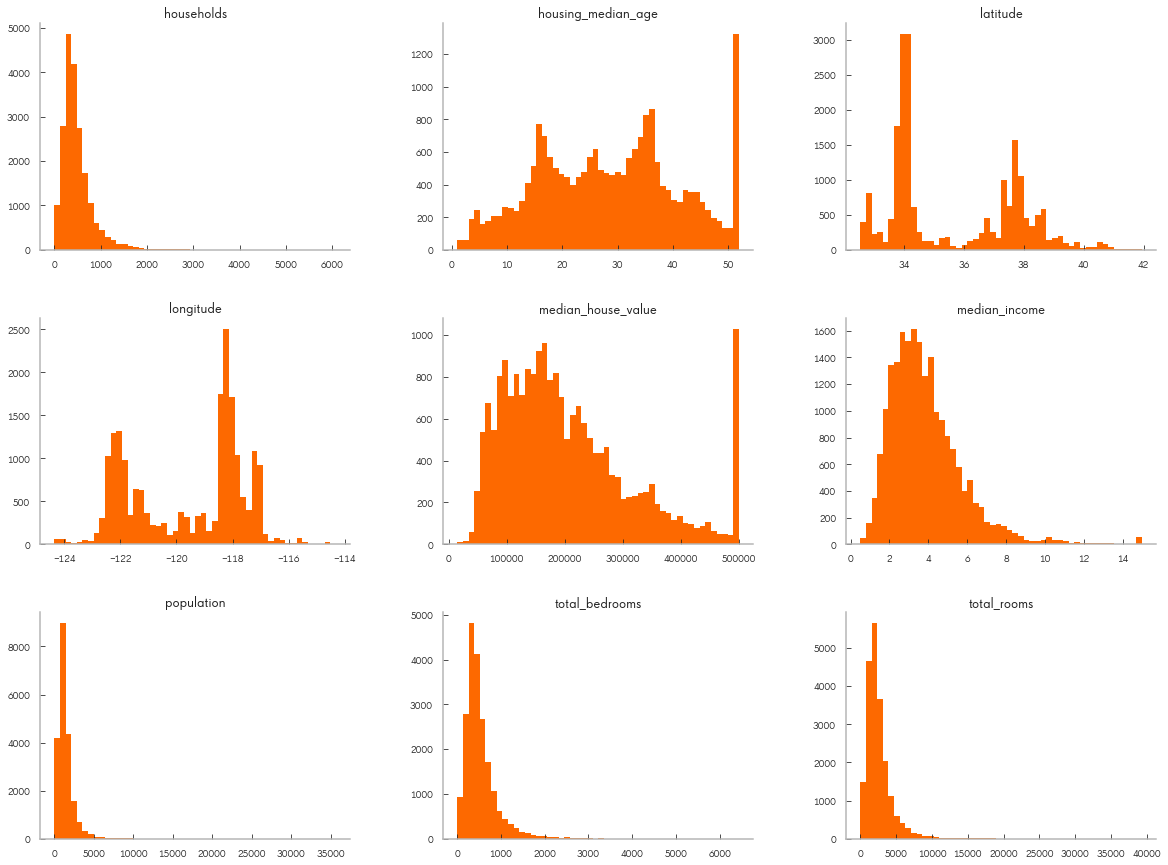

In [6]:
housing_df.hist(bins=50, figsize=(20,15));

## Split the data
Here we create training and test splits

In [7]:
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=8)

In [8]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17875,-121.99,37.40,35.0,1845.0,325.0,1343.0,317.0,5.3912,235300.0,<1H OCEAN
9360,-122.53,37.95,22.0,7446.0,1979.0,2980.0,1888.0,3.5838,271300.0,NEAR BAY
4338,-118.31,34.08,26.0,1609.0,534.0,1868.0,497.0,2.7038,227100.0,<1H OCEAN
986,-121.85,37.72,43.0,228.0,40.0,83.0,42.0,10.3203,400000.0,INLAND
8129,-118.17,33.80,26.0,1589.0,380.0,883.0,366.0,3.5313,187500.0,NEAR OCEAN


In [9]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15722,-122.46,37.78,47.0,1682.0,379.0,837.0,375.0,5.2806,400000.0,NEAR BAY
19685,-121.61,39.14,44.0,2035.0,476.0,1030.0,453.0,1.4661,65200.0,INLAND
6989,-118.04,33.97,29.0,2376.0,700.0,1968.0,680.0,2.6082,162500.0,<1H OCEAN
5804,-118.25,34.15,13.0,1107.0,479.0,616.0,443.0,0.8185,187500.0,<1H OCEAN
5806,-118.26,34.14,29.0,3431.0,1222.0,4094.0,1205.0,2.2614,248100.0,<1H OCEAN


## reduce the number of categories 

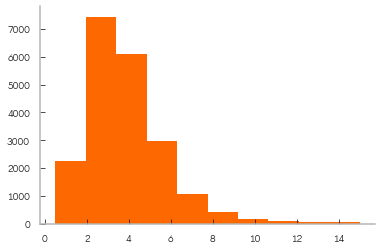

In [10]:
housing_df["median_income"].hist();

In [11]:
# Create income category
# Divide by 1.5 to limit the number of income categories
housing_df["income_cat"] = np.ceil(housing_df["median_income"] / 1.5)
# Label those above 5 as 5
housing_df["income_cat"].where(housing_df["income_cat"] < 5, 5.0, inplace=True)

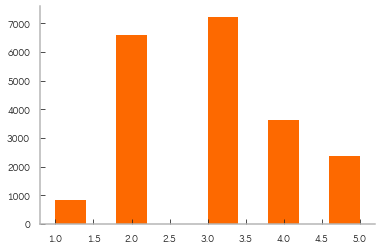

In [12]:
# plot histogram for new category 
housing_df["income_cat"].hist();

In [13]:
housing_df["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

From the above histogram we see the data is not evenly split. We stratify in order to properly represent population with splits. 

## Stratify data

In [14]:
# split data again but this time with strata
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    print(len(train_index))
    print(len(test_index))
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

16512
4128


In [15]:
strat_test_set.shape

(4128, 11)

In [16]:
strat_train_set.shape

(16512, 11)

In [17]:
# strata ratios 
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [18]:
# compared to original population 
housing_df["income_cat"].value_counts() / len(housing_df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [19]:
# Now we can drop the income cat column 
for df in [strat_train_set, strat_test_set]:
    df.drop("income_cat", axis=1, inplace=True)

In [20]:
strat_test_set.shape

(4128, 10)

## Save strata to pickles 

In [21]:
# Save the strata sets
strat_train_set = df.to_pickle('data/interim/'+'strat_train_set'+'.pkl')
strat_test_set = df.to_pickle('data/interim/'+'strat_test_set'+'.pkl')

In [22]:
# read pickles to dataframes
strat_train_set = pd.read_pickle('data/interim/'+'strat_train_set'+'.pkl')
strat_test_set = pd.read_pickle('data/interim/'+'strat_test_set'+'.pkl')

# Explore data (gain insights)
So far we have a general understanding of the data. Let's go a little deeper. First we'll make a copy of the data so we don't alter the training set. Note: we are not working with the full data set from here on. 

In [23]:
housing_df = strat_train_set.copy()

In [24]:
housing_df.shape

(4128, 10)

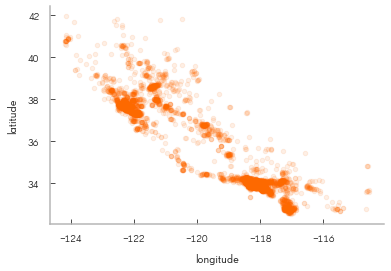

In [25]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

**Looks like California!**

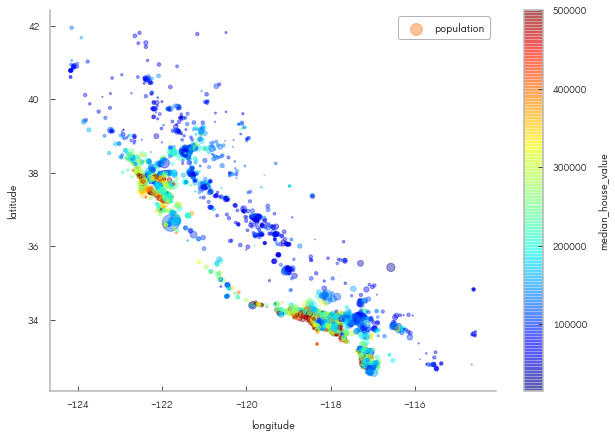

In [26]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing_df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend();

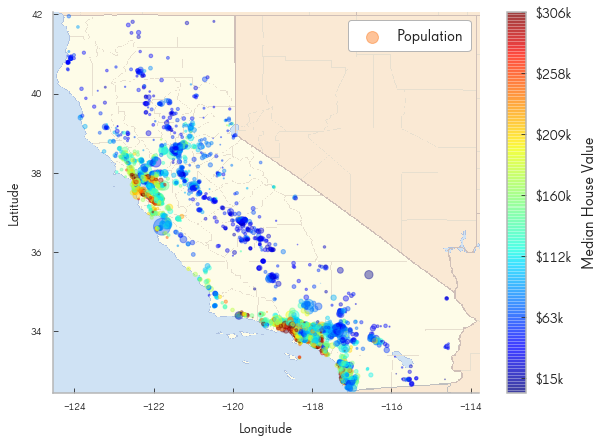

In [27]:
import matplotlib.image as mpimg
california_img=mpimg.imread( 'reports/figures/california.png')
ax = housing_df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing_df['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing_df["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [28]:
housing_df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

We see a strong correlation between median income and median house value. Next let's look at the correlations.

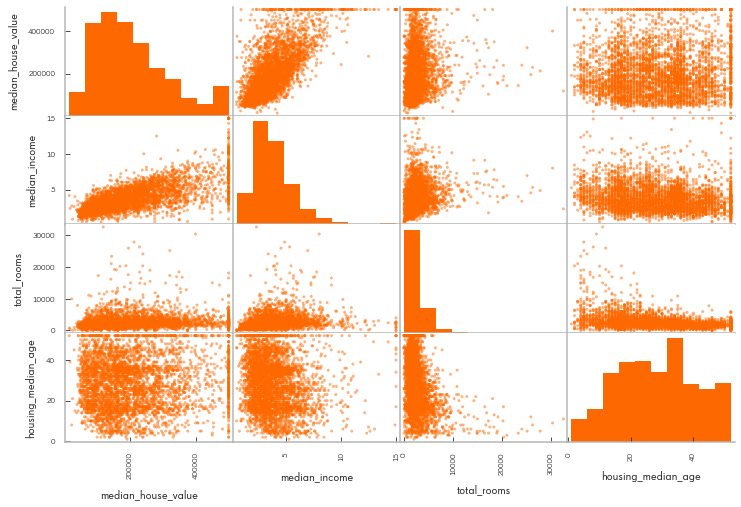

In [29]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
pd.plotting.scatter_matrix (housing_df[attributes], figsize=(12, 8));

[0, 16, 0, 550000]

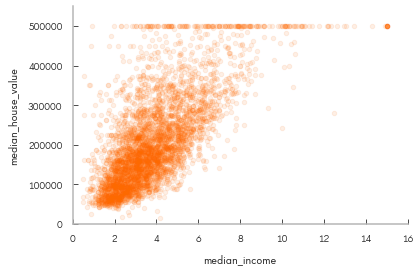

In [30]:
# Let's isolate median income and median house value
housing_df.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

## Experiment with Attribute Combinations 

In [31]:
housing_df["rooms_per_household"] = housing_df["total_rooms"]/housing_df["households"]
housing_df["bedrooms_per_room"] = housing_df["total_bedrooms"]/housing_df["total_rooms"]
housing_df["population_per_household"]=housing_df["population"]/housing_df["households"]

In [32]:
# measure correlation again 
housing_df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691831
rooms_per_household         0.192575
total_rooms                 0.131435
housing_median_age          0.071357
households                  0.071242
total_bedrooms              0.057568
population                 -0.016033
longitude                  -0.039987
population_per_household   -0.135142
latitude                   -0.150124
bedrooms_per_room          -0.240362
Name: median_house_value, dtype: float64

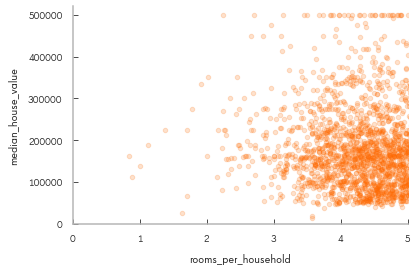

In [33]:
# We created two features (rooms_per_household and bedrooms_per_room) we mild correlation
housing_df.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [34]:
# a bit of a sanity check, look at the new columns
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000,4128.00000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000
mean,-119.545187,35.600998,28.585029,2687.902132,549.484187,1448.220446,509.45688,3.850998,206315.401647,5.383637,0.213684,2.967526
std,2.010260,2.127489,12.630172,2345.868226,454.414696,1197.088364,407.59254,1.879270,114170.048854,1.822611,0.060344,1.584630
min,-124.180000,32.550000,1.000000,2.000000,1.000000,5.000000,1.00000,0.499900,14999.000000,0.846154,0.100000,1.089286
25%,-121.780000,33.920000,18.000000,1474.000000,301.000000,805.750000,283.00000,2.543000,118975.000000,4.434536,0.175927,2.425183
50%,-118.455000,34.220000,28.000000,2158.500000,441.000000,1172.000000,416.00000,3.514750,181300.000000,5.218776,0.203543,2.823084
75%,-117.980000,37.690000,37.000000,3171.000000,653.000000,1754.000000,613.00000,4.739700,269025.000000,6.031716,0.239756,3.286534
max,-114.560000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.00000,15.000100,500001.000000,37.063492,1.000000,63.750000


**We can always return to this step**

# Prepare data for Machine Learning algorithms

In [35]:
# drop labels for training set
# here the drop method also creates a copy 
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

In [36]:
housing.shape

(4128, 9)

## Explore missing data 

In [37]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4309,-118.32,34.09,44.0,2666.0,NaN,2297.0,726.0,1.6760,<1H OCEAN
11096,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN
3912,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN
15030,-117.02,32.78,31.0,2567.0,NaN,1198.0,499.0,3.4659,<1H OCEAN
10885,-117.92,33.70,15.0,3201.0,NaN,1510.0,622.0,4.2708,<1H OCEAN


## Three options to handle missing data 

### drop rows 

In [38]:
 # option 1
sample_incomplete_rows.dropna(subset=["total_bedrooms"])   

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


### drop attributes (columns)

In [39]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4309,-118.32,34.09,44.0,2666.0,2297.0,726.0,1.6760,<1H OCEAN
11096,-117.87,33.83,27.0,2287.0,1140.0,351.0,5.6163,<1H OCEAN
3912,-118.55,34.19,18.0,5862.0,3161.0,1280.0,3.1106,<1H OCEAN
15030,-117.02,32.78,31.0,2567.0,1198.0,499.0,3.4659,<1H OCEAN
10885,-117.92,33.70,15.0,3201.0,1510.0,622.0,4.2708,<1H OCEAN


### impute data

In [40]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4309,-118.32,34.09,44.0,2666.0,441.0,2297.0,726.0,1.6760,<1H OCEAN
11096,-117.87,33.83,27.0,2287.0,441.0,1140.0,351.0,5.6163,<1H OCEAN
3912,-118.55,34.19,18.0,5862.0,441.0,3161.0,1280.0,3.1106,<1H OCEAN
15030,-117.02,32.78,31.0,2567.0,441.0,1198.0,499.0,3.4659,<1H OCEAN
10885,-117.92,33.70,15.0,3201.0,441.0,1510.0,622.0,4.2708,<1H OCEAN


In [41]:
# Use the sklearn imputer class, select median as method 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")    

In [42]:
# remove text data, cannot impute 
# create copy 
housing_num = housing.drop('ocean_proximity', axis=1)

# run imputer on numerical data 
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [43]:
# peak into estimators
imputer.statistics_

array([-118.455  ,   34.22   ,   28.     , 2158.5    ,  441.     ,
       1172.     ,  416.     ,    3.51475])

In [44]:
# sanity check values 
housing_num.median().values

array([-118.455  ,   34.22   ,   28.     , 2158.5    ,  441.     ,
       1172.     ,  416.     ,    3.51475])

### Tranfsform training set 

In [45]:
X = imputer.transform(housing_num)

In [46]:
# convert back into dataframe 
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = housing.index.values)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375


In [47]:
# look at imputed data 
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4309,-118.32,34.09,44.0,2666.0,441.0,2297.0,726.0,1.6760
11096,-117.87,33.83,27.0,2287.0,441.0,1140.0,351.0,5.6163
3912,-118.55,34.19,18.0,5862.0,441.0,3161.0,1280.0,3.1106
15030,-117.02,32.78,31.0,2567.0,441.0,1198.0,499.0,3.4659
10885,-117.92,33.70,15.0,3201.0,441.0,1510.0,622.0,4.2708


In [48]:
# clean index this time
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816
1,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111
2,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119
3,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518
4,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375


### Text Encoding

In [49]:
from sklearn.preprocessing import  OneHotEncoder

In [50]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
5241,<1H OCEAN
10970,<1H OCEAN
20351,<1H OCEAN
6568,INLAND
13285,INLAND


In [51]:
cat_encoder =  OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [52]:
# to see full array 
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [53]:
# view categories text
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

In [54]:
list(housing.columns).index("total_rooms")

3

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [56]:
# Yet another method 
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [57]:
housing_extra_attribs[0:3]

array([[-118.39, 34.12, 29.0, 6447.0, 1012.0, 2184.0, 960.0, 8.2816,
        '<1H OCEAN', 6.715625, 2.275],
       [-117.86, 33.77, 39.0, 4159.0, 655.0, 1669.0, 651.0, 4.6111,
        '<1H OCEAN', 6.38863287250384, 2.563748079877112],
       [-119.05, 34.21, 27.0, 4357.0, 926.0, 2110.0, 876.0, 3.0119,
        '<1H OCEAN', 4.973744292237443, 2.4086757990867578]], dtype=object)

In [58]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(
    housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.39,34.12,29,6447,1012,2184,960,8.2816,<1H OCEAN,6.71563,2.275
1,-117.86,33.77,39,4159,655,1669,651,4.6111,<1H OCEAN,6.38863,2.56375
2,-119.05,34.21,27,4357,926,2110,876,3.0119,<1H OCEAN,4.97374,2.40868
3,-118.15,34.2,52,1786,306,1018,322,4.1518,INLAND,5.54658,3.16149
4,-117.68,34.07,32,1775,314,1067,302,4.0375,INLAND,5.87748,3.53311


### Transformation Pipelines

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [60]:
housing_num_tr.shape

(4128, 11)

In [61]:
housing_num_tr

array([[ 0.57471497, -0.69620912,  0.03285951, ...,  0.73090182,
        -0.43707996, -0.8842083 ],
       [ 0.83839441, -0.86074221,  0.82471029, ...,  0.55147147,
        -0.25483994, -0.8762043 ],
       [ 0.24635944, -0.65390061, -0.12551065, ..., -0.22492016,
        -0.35271202, -0.02496691],
       ...,
       [ 0.52496413, -0.66800344,  0.19122966, ..., -0.48888899,
        -0.50176243,  0.08016752],
       [ 1.10704893, -0.75732141, -0.12551065, ...,  0.63227321,
        -0.06103921, -0.90599188],
       [ 0.31601062,  0.55894333, -0.75899128, ...,  8.13018121,
        -0.39763381, -0.21111508]])

In [62]:
# Now we can combine both pipelines numerical and categorical into one 
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [63]:
housing_prepared

array([[ 0.57471497, -0.69620912,  0.03285951, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83839441, -0.86074221,  0.82471029, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.24635944, -0.65390061, -0.12551065, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.52496413, -0.66800344,  0.19122966, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.10704893, -0.75732141, -0.12551065, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31601062,  0.55894333, -0.75899128, ...,  0.        ,
         0.        ,  0.        ]])

In [64]:
housing_prepared.shape


(4128, 16)

The new matrix contains the original columns transformed plus 5 more columns for the categorical encoder data


In [65]:
# Save the transformed data
from sklearn.externals import joblib
joblib.dump(housing_prepared, 'data/interim/'+'housing_prepared'+'.pkl') 
joblib.dump(housing_labels, 'data/interim/'+'housing_labels'+'.pkl') 

['data/interim/housing_labels.pkl']

# Explore models

In [66]:
# Load saved transformed data
from sklearn.externals import joblib
housing_prepared = joblib.load('data/interim/'+'housing_prepared'+'.pkl') 
housing_labels = joblib.load('data/interim/'+'housing_labels'+'.pkl') 

In [67]:
housing_prepared.shape


(4128, 16)

## Linear Regression 

In [68]:
from sklearn.linear_model import LinearRegression

# instantiate model 
lin_reg = LinearRegression()
# feed the model data and labels 
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing_df.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [421744.42249999 260114.72443261 223619.75780631 197841.21049675
 162428.02376156]


In [70]:
print("Labels:", list(some_labels))

Labels: [500001.0, 240300.0, 218200.0, 182100.0, 121300.0]


In [71]:
for pred, label in zip( lin_reg.predict(some_data_prepared), list(some_labels) ): 
    print('Prediction: {} \t Label: {} '.format(int(pred),int( label)))


Prediction: 421744 	 Label: 500001 
Prediction: 260114 	 Label: 240300 
Prediction: 223619 	 Label: 218200 
Prediction: 197841 	 Label: 182100 
Prediction: 162428 	 Label: 121300 


In [72]:
pd.DataFrame({'Predictions': list( lin_reg.predict(some_data_prepared)) , 'Labels': list(some_labels)})

,Labels,Predictions
0,500001.0,421744.422500
1,240300.0,260114.724433
2,218200.0,223619.757806
3,182100.0,197841.210497
4,121300.0,162428.023762


### Model performance 

In [73]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

66786.21496458739

In [74]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

48821.51499475819

## Decision Tree 

In [75]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [76]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Model Performance 

In [77]:
pd.DataFrame({'Predictions': list(housing_predictions) , 'Labels': list(housing_labels)}).head()

,Labels,Predictions
0,500001.0,500001.0
1,240300.0,240300.0
2,218200.0,218200.0
3,182100.0,182100.0
4,121300.0,121300.0


# Fine tune model

## Decision Tree Regression 

In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
# cv expects a utility function instead of cost function 
tree_rmse_scores = np.sqrt(-scores)

In [79]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [77337.3443527  74690.73647577 76707.97280317 74927.69175246
 73028.20412098 74829.23930049 77685.40011689 73772.25338852
 81027.61519283 76846.96178113]
Mean: 76085.3419284936
Standard deviation: 2215.41954448141


This is peforming worse than linear regression 

## Linear Regression 

In [80]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [63617.83777613 68545.2121548  69704.07640037 65153.12819314
 68300.67945714 69848.69045216 70313.85379963 65268.65765778
 69677.18715774 62192.37769492]
Mean: 67262.1700743812
Standard deviation: 2791.574395257554


## Random Forrest Regression 

In [81]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [82]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

23455.822660665053

In [83]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [54987.46218651 57668.57345367 61220.11060715 54224.13749018
 59073.55292675 54316.71757133 56730.30295053 54370.57843228
 60432.70260986 51420.27620512]
Mean: 56444.44144333804
Standard deviation: 2972.012406959129


## Support Vector Machines (linear kernel)

A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In [84]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

114543.62541259706

In [85]:
svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [113978.6577051  114365.24102069 115392.4857292  119366.08036426
 113407.3808349  117815.05168172 106746.84897989 114397.24667727
 123819.93643004 107547.33961541]
Mean: 114683.62690384829
Standard deviation: 4815.953000421483


In [86]:
# rbf kernel 
svm_reg = SVR(kernel="rbf", gamma='auto')
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

116750.75284344256

In [87]:
svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [116041.5489715  116346.81942542 117309.8529965  121499.89251287
 115541.76778457 119930.32484023 108554.62191827 116532.20515673
 126055.35585624 109284.53618272]
Mean: 116709.69256450523
Standard deviation: 4946.027396748644


## Grid Search 
- Grid search helps you find the best hyper parameters 
- In the case below there will be $(3*4 + 2*3)*5=(12 + 6)*5 = 90$ trainings

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,n_jobs=-1,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30]}, {'max_features': [2, 3, 4], 'bootstrap': [False], 'n_estimators': [3, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [89]:
print('The best hyperparameter combination found: {}'.format(grid_search.best_params_)) 

The best hyperparameter combination found: {'max_features': 8, 'n_estimators': 30}


In [90]:
# parameters for best estimator 
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

### Looking at the score for each hyper parameters combination 


In [91]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(int(np.sqrt(-mean_score)), params)

70008 {'max_features': 2, 'n_estimators': 3}
59239 {'max_features': 2, 'n_estimators': 10}
57032 {'max_features': 2, 'n_estimators': 30}
64557 {'max_features': 4, 'n_estimators': 3}
56231 {'max_features': 4, 'n_estimators': 10}
54013 {'max_features': 4, 'n_estimators': 30}
63594 {'max_features': 6, 'n_estimators': 3}
55367 {'max_features': 6, 'n_estimators': 10}
53414 {'max_features': 6, 'n_estimators': 30}
62335 {'max_features': 8, 'n_estimators': 3}
55381 {'max_features': 8, 'n_estimators': 10}
53126 {'max_features': 8, 'n_estimators': 30}
69012 {'max_features': 2, 'bootstrap': False, 'n_estimators': 3}
58657 {'max_features': 2, 'bootstrap': False, 'n_estimators': 10}
65303 {'max_features': 3, 'bootstrap': False, 'n_estimators': 3}
56705 {'max_features': 3, 'bootstrap': False, 'n_estimators': 10}
64633 {'max_features': 4, 'bootstrap': False, 'n_estimators': 3}
55868 {'max_features': 4, 'bootstrap': False, 'n_estimators': 10}


In [92]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
11,0.758684,0.012210,-2.822437e+09,-4.214984e+08,NaN,8,30,"{'max_features': 8, 'n_estimators': 30}",1,-2.910091e+09,...,-2.735486e+09,-4.300119e+08,-2.690065e+09,-4.321468e+08,-2.811227e+09,-4.218837e+08,0.148701,0.001146,1.032099e+08,9.207945e+06
8,0.579784,0.014939,-2.853126e+09,-4.336464e+08,NaN,6,30,"{'max_features': 6, 'n_estimators': 30}",2,-2.866822e+09,...,-2.860887e+09,-4.466845e+08,-2.681912e+09,-4.358375e+08,-2.836342e+09,-4.302742e+08,0.146818,0.004467,1.072334e+08,7.259267e+06
5,0.447878,0.028491,-2.917455e+09,-4.465449e+08,NaN,4,30,"{'max_features': 4, 'n_estimators': 30}",3,-2.990936e+09,...,-2.842256e+09,-4.335941e+08,-2.838632e+09,-4.459875e+08,-2.866625e+09,-4.479043e+08,0.104560,0.020835,8.611133e+07,7.973112e+06
7,0.177921,0.005960,-3.065598e+09,-5.743280e+08,NaN,6,10,"{'max_features': 6, 'n_estimators': 10}",4,-3.199728e+09,...,-3.094329e+09,-5.732452e+08,-2.872414e+09,-5.817381e+08,-3.003144e+09,-5.630658e+08,0.058321,0.001896,1.171072e+08,6.714790e+06
10,0.189748,0.005687,-3.067134e+09,-5.600304e+08,NaN,8,10,"{'max_features': 8, 'n_estimators': 10}",5,-3.136248e+09,...,-3.025465e+09,-5.714293e+08,-2.976121e+09,-5.645380e+08,-3.023858e+09,-5.699087e+08,0.052756,0.000818,7.490209e+07,1.158084e+07
17,0.223248,0.008883,-3.121236e+09,0.000000e+00,False,4,10,"{'max_features': 4, 'bootstrap': False, 'n_est...",6,-3.142334e+09,...,-3.197125e+09,-0.000000e+00,-3.057189e+09,-0.000000e+00,-3.105414e+09,-0.000000e+00,0.064329,0.001643,4.658981e+07,0.000000e+00
4,0.142156,0.004926,-3.161994e+09,-5.995111e+08,NaN,4,10,"{'max_features': 4, 'n_estimators': 10}",7,-3.229916e+09,...,-2.998472e+09,-5.773579e+08,-3.114222e+09,-6.057566e+08,-3.155499e+09,-6.057284e+08,0.019815,0.000574,1.059642e+08,1.122922e+07
15,0.145032,0.006885,-3.215493e+09,0.000000e+00,False,3,10,"{'max_features': 3, 'bootstrap': False, 'n_est...",8,-3.394998e+09,...,-3.171556e+09,-0.000000e+00,-2.944640e+09,-0.000000e+00,-3.137769e+09,-0.000000e+00,0.024832,0.000391,1.781737e+08,0.000000e+00
2,0.242620,0.033855,-3.252717e+09,-4.909257e+08,NaN,2,30,"{'max_features': 2, 'n_estimators': 30}",9,-3.199660e+09,...,-3.291826e+09,-5.023867e+08,-3.132879e+09,-4.921267e+08,-3.279530e+09,-4.831794e+08,0.076409,0.021563,7.853708e+07,6.491569e+06
13,0.138130,0.006881,-3.440647e+09,0.000000e+00,False,2,10,"{'max_features': 2, 'bootstrap': False, 'n_est...",10,-3.384104e+09,...,-3.578700e+09,-0.000000e+00,-3.508490e+09,-0.000000e+00,-3.494649e+09,-0.000000e+00,0.016733,0.000989,1.192420e+08,0.000000e+00


### Randomized Solution 

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_jobs=-1,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a178c97f0>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a178c93c8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

### results

In [94]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

52933.48550666898 {'max_features': 7, 'n_estimators': 180}
55373.89657762311 {'max_features': 5, 'n_estimators': 15}
54191.968835449145 {'max_features': 3, 'n_estimators': 72}
54851.48225434205 {'max_features': 5, 'n_estimators': 21}
53043.33787586482 {'max_features': 7, 'n_estimators': 122}
54203.72048982251 {'max_features': 3, 'n_estimators': 75}
53986.48278369907 {'max_features': 3, 'n_estimators': 88}
52986.37755832063 {'max_features': 5, 'n_estimators': 100}
53782.58952411186 {'max_features': 3, 'n_estimators': 150}
71602.79629507865 {'max_features': 5, 'n_estimators': 2}


In [95]:
print('The best hyperparameter combination found: {}'.format(rnd_search.best_params_)) 

The best hyperparameter combination found: {'max_features': 7, 'n_estimators': 180}


### feature importance

In [96]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.0551887 , 0.05097143, 0.04255885, 0.01743378, 0.01609399,
       0.01757076, 0.01561372, 0.37202085, 0.05601396, 0.10817195,
       0.06566939, 0.00677832, 0.16861351, 0.00045692, 0.00142688,
       0.005417  ])

In [97]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3720208508757752, 'median_income'),
 (0.16861351152340925, 'INLAND'),
 (0.10817194627215071, 'pop_per_hhold'),
 (0.06566938960629133, 'bedrooms_per_room'),
 (0.05601395528029696, 'rooms_per_hhold'),
 (0.05518870083939731, 'longitude'),
 (0.05097142871052785, 'latitude'),
 (0.0425588492779148, 'housing_median_age'),
 (0.017570760630380804, 'population'),
 (0.017433782468558267, 'total_rooms'),
 (0.016093994139981548, 'total_bedrooms'),
 (0.015613715863046924, 'households'),
 (0.0067783179241661185, '<1H OCEAN'),
 (0.005416997669485698, 'NEAR OCEAN'),
 (0.001426876117779899, 'NEAR BAY'),
 (0.00045692280083734773, 'ISLAND')]

Median income is the number one predictor on housing prices. Using the information above we can decide to drop certain features. 

## Evaluate Test data

In [98]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [99]:
final_rmse

20387.03184603207

In [100]:
print('prediction \t actual \t\t error')
for pred, value in zip(final_predictions[:15],y_test[:15]):
    print('{} \t\t {} \t\t {:.0%}'.format(int(pred), int(value), (pred-value)/value))

prediction 	 actual 		 error
483240 		 500001 		 -3%
246183 		 240300 		 2%
216113 		 218200 		 -1%
178006 		 182100 		 -2%
131043 		 121300 		 8%
127520 		 120600 		 6%
72466 		 72300 		 0%
476634 		 500001 		 -5%
104123 		 98900 		 5%
92756 		 82600 		 12%
373733 		 399400 		 -6%
77103 		 78600 		 -2%
242603 		 212500 		 14%
186693 		 174100 		 7%
237830 		 258100 		 -8%


In [101]:
# average abs % error 
int((abs(final_predictions-y_test)/y_test*100).mean())


7